Objetivo:

Realizar Máquinas de vectores de soporte en 2D: Para SII.    
Para los datos preetiquetados: 12.45% Pre-etiquetadas - 158 galaxias, se van a dividir así:  
54% = Datos de entrenamiento = 85 Datos.  
46% = Datos para tomar la exactitud = 73 Datos.  

* 0. Traer Datos Pre-etiqDeBase: Con 1269 Observaciones en Visual e infrarrojo. 
* 1. Hacer Máquinas de vectores de soporte= 'Ejex_SH', 'Ejey_OHB'.
* 2. Medición de exactitud con el 40% restante de los datos. 
* 3. Realizar gráfica.

## 0. Datos:

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import date
import warnings
warnings.filterwarnings 
import astropy.units as u
from astropy.table import Table
from astroquery.sdss import SDSS
from array import array
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
FusionData = pd.read_csv('C:/Users/Cristina Quiazúa M/Desktop/MyBPT/Results/3. Paquete de ML/Mydata.csv')

In [3]:
FusionData[0:5]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,fnu_100,rat_12_25,rat_25_60,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,15.08,0.700000,0.096899,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,1.01,1.555556,0.329268,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,1.79,0.500000,0.666667,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.6539,263.62670,358.444700,54.00912,...,2.83,0.591837,0.401639,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.6220,74.79313,28.152840,74.78139,...,2.10,0.813953,0.632353,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja


In [4]:
conteoEtiqRef = FusionData['EtiqRef'].value_counts()
conteoEtiqRef

Infrarroja    75
Seyfert       60
LINER         23
Name: EtiqRef, dtype: int64

In [5]:
grupo1 = FusionData.sample(frac=0.6, random_state=1)
grupo2 = FusionData.drop(grupo1.index)

In [6]:
FusionData['EtiqRef60%'] = grupo1['EtiqRef']
FusionData['EtiqRef40%'] = grupo2['EtiqRef']

In [7]:
FusionData[0:5]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,rat_25_60,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef,EtiqRef60%,EtiqRef40%
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,0.096899,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN,NaN,NaN
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,0.329268,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN,NaN,NaN
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,0.666667,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN,NaN,NaN
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.6539,263.62670,358.444700,54.00912,...,0.401639,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN,NaN,NaN
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.6220,74.79313,28.152840,74.78139,...,0.632353,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja,NaN,Infrarroja


### División por grupos EtiqRef 600% y 40%

In [8]:
conteoEtiqRef60 = FusionData['EtiqRef60%'].value_counts()
conteoEtiqRef60

Infrarroja    43
Seyfert       27
LINER         15
Name: EtiqRef60%, dtype: int64

In [9]:
conteoEtiqRef40 = FusionData['EtiqRef40%'].value_counts()
conteoEtiqRef40

Seyfert       33
Infrarroja    32
LINER          8
Name: EtiqRef40%, dtype: int64

## 1. Hacer MaquinasVS para X = 'Ejex_NH', 'Ejey_OHb'.

In [10]:
# Seleccionar solo las filas con etiquetas conocidas para el entrenamiento
training_data = FusionData.dropna(subset=['EtiqRef60%'])

In [11]:
# Seleccionar las características (X) y la variable objetivo (y) para el entrenamiento
X_train = training_data[['Ejex_SH', 'Ejey_OHb']]
y_train = training_data['EtiqRef60%']

In [12]:
# Crear un clasificador SVM
clf = SVC(kernel='linear', C=1)

# Entrenar el clasificador con los datos de entrenamiento
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [13]:
# Realizar predicciones para todos los datos
X_all = FusionData[['Ejex_SH', 'Ejey_OHb']]
y_pred = clf.predict(X_all)

In [14]:
# Añadir la columna de clusters al DataFrame original
FusionData["PredicSVM_S"] = y_pred
FusionData[0:5]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef,EtiqRef60%,EtiqRef40%,PredicSVM_S
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN,NaN,NaN,Infrarroja
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN,NaN,NaN,Infrarroja
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN,NaN,NaN,Infrarroja
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.6539,263.62670,358.444700,54.00912,...,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN,NaN,NaN,Infrarroja
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.6220,74.79313,28.152840,74.78139,...,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja,NaN,Infrarroja,Infrarroja


In [15]:
conteoPredicSVM_N = FusionData['PredicSVM_S'].value_counts()
conteoPredicSVM_N

Infrarroja    1135
Seyfert         77
LINER           57
Name: PredicSVM_S, dtype: int64

## 2. Medición de exactitud con Frecuencia cruzada

In [16]:
tabla_frecuencias = pd.crosstab(FusionData['EtiqRef40%'], FusionData['PredicSVM_S'], margins=True, margins_name="Total")
tabla_frecuencias

PredicSVM_S,Infrarroja,LINER,Seyfert,Total
EtiqRef40%,,,,
Infrarroja,32,0,0,32
LINER,0,8,0,8
Seyfert,0,2,31,33
Total,32,10,31,73


In [17]:
# Para obtener las cantidades de coincidencias específicas, puedes acceder a los valores en la tabla
coincidencias_infrarroja = tabla_frecuencias.loc['Infrarroja', 'Infrarroja']
coincidencias_seyfert = tabla_frecuencias.loc['Seyfert', 'Seyfert']
coincidencias_liner = tabla_frecuencias.loc['LINER', 'LINER']

print("Coincidencias Infrarroja:", coincidencias_infrarroja)
print("Coincidencias Seyfert:", coincidencias_seyfert)
print("Coincidencias LINER:", coincidencias_liner)

Coincidencias Infrarroja: 32
Coincidencias Seyfert: 31
Coincidencias LINER: 8


### Cálculos

In [18]:
# Calcula los verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos
verdaderos_positivos = tabla_frecuencias.loc['Infrarroja', 'Infrarroja']
falsos_positivos = tabla_frecuencias.loc['Total', 'Infrarroja'] - verdaderos_positivos
falsos_negativos = tabla_frecuencias.loc['Infrarroja', 'Total'] - verdaderos_positivos
verdaderos_negativos = tabla_frecuencias.loc['Total', 'Total'] - verdaderos_positivos - falsos_positivos - falsos_negativos

In [19]:
# Calcula la Precisión
precision = verdaderos_positivos / (verdaderos_positivos + falsos_positivos)
# Calcula la Sensibilidad
sensibilidad = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)

In [20]:
# Calcula los Falsos Positivos y Falsos Negativos
falsos_positivos = falsos_positivos / (falsos_positivos + verdaderos_negativos)
falsos_negativos = falsos_negativos / (falsos_negativos + verdaderos_positivos)

In [21]:
# Imprime los resultados
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Falsos Positivos:", falsos_positivos)
print("Falsos Negativos:", falsos_negativos)

Precisión: 1.0
Sensibilidad: 1.0
Falsos Positivos: 0.0
Falsos Negativos: 0.0


## 3. Realizar gráfica

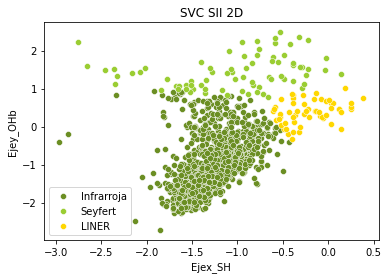

In [22]:
infrarroja_df = FusionData[FusionData['PredicSVM_S'] == 'Infrarroja']
seyfert_df = FusionData[FusionData['PredicSVM_S'] == 'Seyfert']
liner_df = FusionData[FusionData['PredicSVM_S'] == 'LINER']

sns.scatterplot(data=infrarroja_df, x='Ejex_SH', y='Ejey_OHb', color='olivedrab', label='Infrarroja', marker='o')
sns.scatterplot(data=seyfert_df, x='Ejex_SH', y='Ejey_OHb', color='yellowgreen', label='Seyfert', marker='o')
sns.scatterplot(data=liner_df, x='Ejex_SH', y='Ejey_OHb', color='gold', label='LINER', marker='o')

plt.xlabel('Ejex_SH')
plt.ylabel('Ejey_OHb')
plt.title('SVC SII 2D')
plt.legend()
plt.show()

# Conclusiones:    

## 2. Medición: 100%